## EDA and User Rating Prediction of Amazon's Bestselling Books

- Analyse the data and retrieve some meaningful insights and Predict user rating of a book.
- Data obtained from Kaggle : https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019 
- Python(Jupyter Notebook) is used for analysis.

### Importing relavent libraries...

In [24]:
import numpy as np
import pandas as pd

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

%matplotlib inline

In [26]:
import plotly.graph_objs as go
import plotly.offline as iplot
import plotly.express as px

### Importing data...

In [27]:
df = pd.read_csv("bestsellers with categories.csv")

In [28]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


### Checking of data and Data Cleaning... 

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [30]:
df.shape

(550, 7)

- There are 550 rows and 7 columns in DataFrame...!!!

#### Checking for null value...

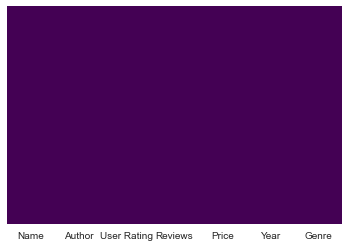

In [31]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

plt.show()

- No null value is in DataFrame

#### Summary of DataFrame

In [32]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


### Exploratory Data Analysis

In [33]:
df.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

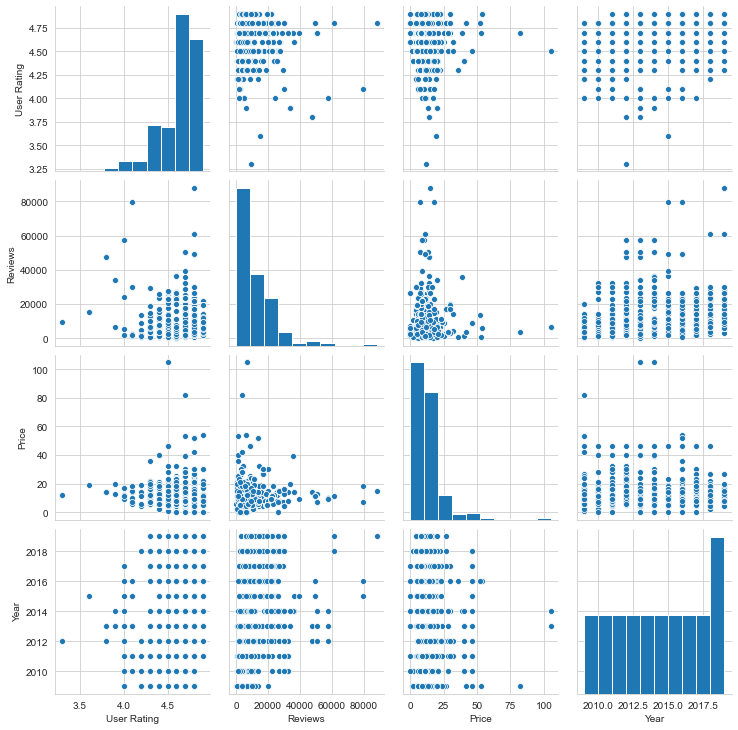

In [34]:
sns.pairplot(df)

plt.show()

#### Books genre and their quantities

In [35]:
df['Genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

- There are two genre of books:
- 1- Fiction  
- 2- Non Fiction

In [36]:
print(df['Genre'].value_counts())
print('\n')

px.pie(data_frame=df,names =df['Genre'].value_counts().index, values= df['Genre'].value_counts(),hole = 0.41,
      title = 'Quantity per Genre')

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64




In [37]:
print('Number of unique books : ',df['Name'].nunique())
print('Number of unique authors : ', df['Author'].nunique())

Number of unique books :  351
Number of unique authors :  248


#### Year wise minimum, maximum and mean 'User Rating' of books

In [38]:
user_rating = df.groupby('Year')['User Rating'].agg(['min','max','mean']).reset_index()

In [39]:
user_rating

,Year,min,max,mean
0,2009,4.0,4.8,4.584
1,2010,4.0,4.8,4.558
2,2011,4.0,4.9,4.558
3,2012,3.3,4.9,4.532
4,2013,3.8,4.9,4.554
5,2014,3.9,4.9,4.622
6,2015,3.6,4.9,4.648
7,2016,4.0,4.9,4.678
8,2017,4.0,4.9,4.660
9,2018,4.2,4.9,4.668


In [40]:
user_rating.columns = ['year','min_rating','max_rating','mean_rating']

In [46]:
px.line(data_frame=user_rating,x = 'year',y = ['min_rating','max_rating','mean_rating'],
       title = 'Min_Max_Average User Rating per Year')

- From above plot we can observe the minimum,maximum and average 'User Rating' year wise...!!!

#### Year wise minimum, maximum and mean 'Price' of books

In [47]:
price = df.groupby('Year')['Price'].agg(['min','max','mean']).reset_index()

In [48]:
price

,Year,min,max,mean
0,2009,1,82,15.40
1,2010,0,46,13.48
2,2011,0,46,15.10
3,2012,5,46,15.30
4,2013,0,105,14.60
5,2014,0,105,14.64
6,2015,0,46,10.42
7,2016,0,54,13.18
8,2017,0,46,11.38
9,2018,2,46,10.52


In [49]:
price.columns = ['year','min_price','max_price','mean_price']

In [50]:
px.line(data_frame=price,x = 'year',y = ['min_price','max_price','mean_price'],
       title= 'Min_Max_Average Price per Year')

- From above plot we can observe the minimum,maximum and average 'Price' trend year wise...!!!

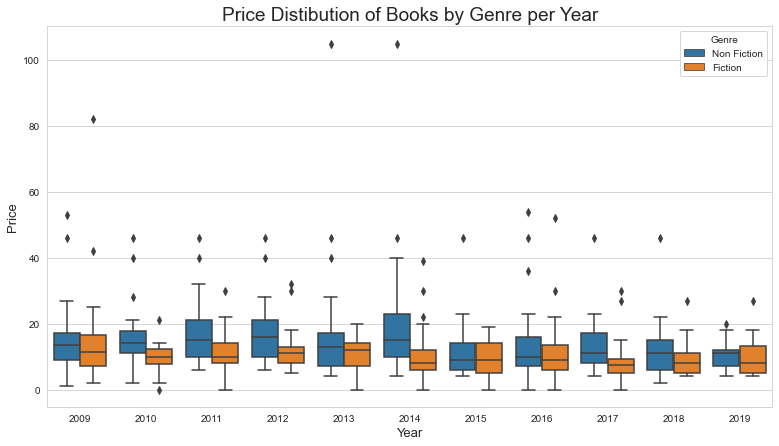

In [53]:
plt.figure(figsize = (13,7))

sns.boxplot(x = 'Year', y = 'Price', data = df, hue = 'Genre')

plt.title('Price Distibution of Books by Genre per Year',fontsize = 19)
plt.xlabel('Year',fontsize = 13)
plt.ylabel('Price',fontsize = 13)

plt.show()

- Above plot shows the Price distibution of books by genre per year...!!!

#### Year wise minimum, maximum and mean 'Reviews' of books

In [54]:
reviews = df.groupby('Year')['Reviews'].agg(['min','max','mean']).reset_index()

In [55]:
reviews.columns = ['year','min_reviews','max_reviews','mean_reviews']
reviews

,year,min_reviews,max_reviews,mean_reviews
0,2009,37,19720,4710.12
1,2010,408,32122,5479.62
2,2011,637,32122,8100.82
3,2012,1201,57271,13090.92
4,2013,220,57271,13098.14
5,2014,978,57271,15859.94
6,2015,1873,79446,14233.38
7,2016,807,79446,14196.00
8,2017,1831,29442,12888.40
9,2018,2507,61133,13930.42


In [56]:
px.line(data_frame=reviews,x = 'year',y = ['min_reviews','max_reviews','mean_reviews'],
       title = 'Min_Max_Average Reviews per Year')

- Minimum, Maximum and Average number of Reviews per year shown by above plot...!!!

#### Author and their minimum, maximum and mean 'User Rating'

In [57]:
author = df.groupby('Author')['User Rating'].agg(['min','max','mean']).reset_index()

In [58]:
author.head()

,Author,min,max,mean
0,Abraham Verghese,4.6,4.6,4.6
1,Adam Gasiewski,4.4,4.4,4.4
2,Adam Mansbach,4.8,4.8,4.8
3,Adir Levy,4.8,4.8,4.8
4,Admiral William H. McRaven,4.7,4.7,4.7


In [59]:
author.shape

(248, 4)

#### Authors and their book count

In [60]:
author2 = df.groupby('Author')['Name'].count().reset_index().sort_values(by = 'Name',ascending = False)

In [61]:
author2.columns = ['Author','No of Books']

In [62]:
author2.head()

,Author,No of Books
120,Jeff Kinney,12
92,Gary Chapman,11
226,Suzanne Collins,11
197,Rick Riordan,11
11,American Psychological Association,10


In [63]:
author2.shape

(248, 2)

#### Numer of books per 'Genre' per 'Year'

In [64]:
df.groupby('Year')['Genre'].value_counts()

Year  Genre      
2009  Non Fiction    26
      Fiction        24
2010  Non Fiction    30
      Fiction        20
2011  Non Fiction    29
      Fiction        21
2012  Non Fiction    29
      Fiction        21
2013  Non Fiction    26
      Fiction        24
2014  Fiction        29
      Non Fiction    21
2015  Non Fiction    33
      Fiction        17
2016  Non Fiction    31
      Fiction        19
2017  Non Fiction    26
      Fiction        24
2018  Non Fiction    29
      Fiction        21
2019  Non Fiction    30
      Fiction        20
Name: Genre, dtype: int64

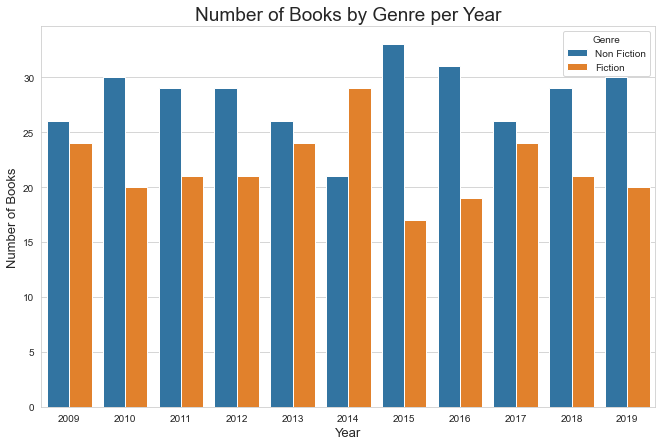

In [65]:
plt.figure(figsize=(11,7))

sns.countplot(x = 'Year' , data = df,hue = 'Genre')
plt.title('Number of Books by Genre per Year',fontsize = 19)
plt.xlabel('Year',fontsize = 13)
plt.ylabel('Number of Books',fontsize = 13)

plt.show()

#### Checking of categorical and numerical columns...

In [67]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']

In [69]:
print('Categorical columns: \n',cat_col)

Categorical columns: 
 ['Name', 'Author', 'Genre']


In [70]:
num_col = [col for col in df.columns if df[col].dtype != 'object']

In [71]:
print('Numerical columns: \n',num_col)

Numerical columns: 
 ['User Rating', 'Reviews', 'Price', 'Year']


#### Converting Categorical Features...
- We'll need to convert categorical features by 'LabelEncoding' Otherwise our machine learning algorithm won't be able to directly take in those features as inputs...!!!

In [72]:
from sklearn.preprocessing import LabelEncoder

In [73]:
encoder = LabelEncoder()

In [74]:
df['Author'] = encoder.fit_transform(df['Author'])

In [75]:
df['Genre'] = encoder.fit_transform(df['Genre'])

In [76]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,114,4.7,17350,8,2016,1
1,11/22/63: A Novel,219,4.6,2052,22,2011,0
2,12 Rules for Life: An Antidote to Chaos,134,4.7,18979,15,2018,1
3,1984 (Signet Classics),95,4.7,21424,6,2017,0
4,"5,000 Awesome Facts (About Everything!) (Natio...",174,4.8,7665,12,2019,1


#### Checking for outlires...

In [77]:
def plot(df,col):
    fig,(ax1,ax2) = plt.subplots(2,1)
    sns.distplot(df[col],ax = ax1)
    sns.boxplot(df[col],ax = ax2)

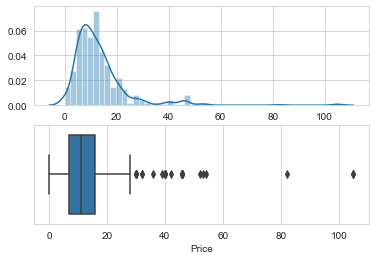

In [78]:
plot(df,'Price')

- There are some outliers in Price of books
- Data points that are greater than 40 are outliers
- We will replace those points with median else they may affect our ML model

#### Handling outliers...

In [86]:
df['Price'] = np.where(df['Price']>40, df['Price'].median(),df['Price'])

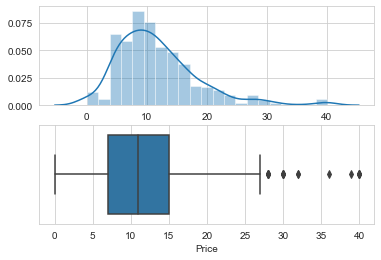

In [87]:
plot(df,'Price')

- There are less outliers than previous so that's totally okay.

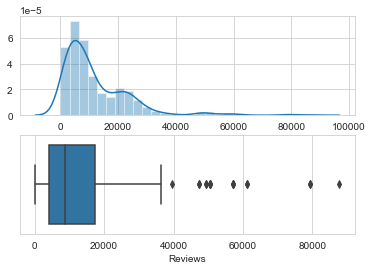

In [88]:
plot(df,'Reviews')

- There are some outliers in Reviews of books
- Data points that are greater than 40000 are outliers
- We will replace those points with median else they may affect our ML model

In [89]:
df['Reviews'] = np.where(df['Reviews'] >40000,df['Reviews'].median(),df['Reviews'] )

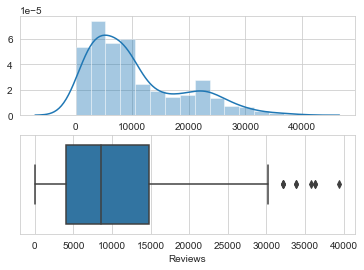

In [90]:
plot(df,'Reviews')

- There are less outliers than previous so that's totally okay.

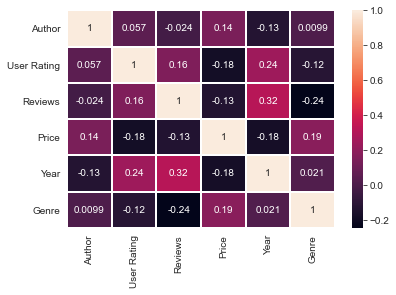

In [91]:
sns.heatmap(df.corr(), annot= True, linewidths=1,linecolor='white')

plt.show()

- Our data is almost ready...!!!

### Training a Linear Regression Model
#### Training and Testing Data
#### Selecting Dependent and Independent Variables 


In [93]:
# Independent Variable
X = df.drop(['User Rating','Name'], axis = 1)

In [94]:
# Dependent Variable
y = df['User Rating']

#### Train Test Split
- Split the data into training and testing set

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

#### Creating and Training model

In [97]:
from sklearn.linear_model import LinearRegression

In [98]:
lm = LinearRegression()

In [99]:
lm.fit(X_train,y_train)

LinearRegression()

#### Prediction from our Model

In [106]:
predictions = lm.predict(X_test)

In [107]:
# Comparing actual Vs predicted
act_pred = pd.DataFrame({'actual':y_test,'predicted':predictions})
act_pred.head()

,actual,predicted
220,4.5,4.681078
18,4.5,4.610026
391,4.8,4.726790
141,4.5,4.540215
354,4.7,4.537885


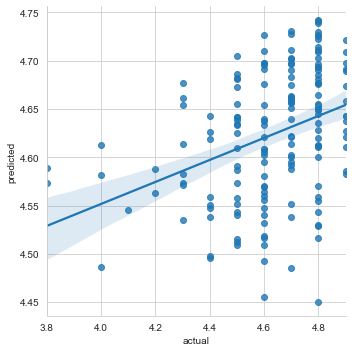

In [113]:
sns.lmplot(data = act_pred,x = 'actual',y = 'predicted')

plt.show()

#### Residual Plot

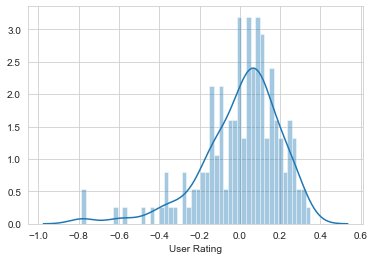

In [114]:
sns.distplot(y_test-predictions,bins=50)

plt.show()

#### Model evaluation...

In [115]:
print(lm.intercept_)

-27.147535190867618


In [116]:
print('Coefficient: \n',lm.coef_)

Coefficient: 
 [ 2.69445992e-04  8.58271155e-07 -4.67268322e-03  1.57844019e-02
 -2.56431091e-02]


In [117]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Author,2.694460e-04
Reviews,8.582712e-07
Price,-4.672683e-03
Year,1.578440e-02
Genre,-2.564311e-02


In [118]:
from sklearn import metrics

In [119]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('r2 score:',metrics.r2_score(y_test,predictions))

MAE: 0.1483703272172758
MSE: 0.03932176820856324
RMSE: 0.19829717145880635
r2 score: 0.1269774762867515


In [122]:
print('Training Score: \n',lm.score(X_train,y_train))

Training Score: 
 0.08691911399280428


In [123]:
print('Testing Score: \n',lm.score(X_test,y_test))

Testing Score: 
 0.1269774762867515
